In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import GridSearchCV

## XGBoost Modelling

### Initial Model

In [3]:
train_test_data = pd.read_csv('../../../data/train_test_data/train_test_data.csv')

In [4]:
train_test_data.dropna(inplace=True)
train_test_data

,timestamp,rank,ticker,name,mentions,mentioning_users,upvotes,sentiment,rank_24h_ago,mentions_24h_ago,...,return_on_equity_ttm,dividend_yield_annual,total_debt_to_equity_quarterly,revenue_growth_ttm_yoy,dividend_exists,rank_percentage_change_24h,mentions_percentage_change_24h,opening_price,closing_price,label
0,06-18-2023,2,AMD,AMD,56,42.0,112,67.0,4,54,...,2.4000,0.000000,0.0451,22.20,0,-0.500000,0.037037,125.82,120.08,0
1,06-18-2023,3,TSLA,Tesla,48,45.0,462,51.0,3,61,...,27.9000,0.000000,0.0557,38.34,0,0.000000,-0.213115,258.92,260.54,1
2,06-18-2023,4,NVDA,NVIDIA,44,41.0,262,57.0,2,88,...,20.8800,0.037512,0.4467,-12.40,1,1.000000,-0.500000,434.50,426.92,0
4,06-18-2023,7,AAPL,Apple,32,30.0,226,70.0,10,20,...,165.7200,0.516101,1.7635,-0.24,1,-0.300000,0.600000,186.73,184.92,0
5,06-18-2023,9,DTE,DTE Energy,23,22.0,146,56.0,6,44,...,11.7500,3.344746,1.8338,-15.52,1,0.500000,-0.477273,114.56,114.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,06-16-2023,7,PLTR,Palantir,184,84.0,588,65.0,12,53,...,-7.1566,0.000000,0.0000,20.50,0,-0.416667,2.471698,16.87,16.30,0
196,06-16-2023,8,MSFT,Microsoft,126,82.0,613,73.0,24,35,...,38.4600,0.781385,0.3322,7.81,1,-0.666667,2.600000,351.32,342.33,0
197,06-16-2023,9,SPCE,Virgin Galactic,125,99.0,739,68.0,164,3,...,1.8000,0.000000,1.1349,-33.95,0,-0.945122,40.666667,5.72,4.73,0
198,06-16-2023,10,NKLA,Nikola,117,79.0,285,75.0,10,56,...,1.1500,0.000000,0.5830,3082.56,0,0.000000,1.089286,1.70,1.19,0


In [5]:
# Remove columns that are not needed for modelling

train_test_data = train_test_data.drop(
    ['name', 
     'ticker', 
     'timestamp',
    'opening_price',
   'closing_price',
   'rank_24h_ago',
   'mentions_24h_ago',
   'rank', 'dividend_exists'
    ], axis=1).sort_values(
    by=['mentions'], 
    ascending=False)

In [6]:
train_test_data

,mentions,mentioning_users,upvotes,sentiment,beta,earnings_per_share_ttm,price_to_equity_ttm,return_on_equity_ttm,dividend_yield_annual,total_debt_to_equity_quarterly,revenue_growth_ttm_yoy,rank_percentage_change_24h,mentions_percentage_change_24h,label
30,3216,1370.0,30860,57.0,1.770654,1.7415,173.5333,18.66000,0.052394,0.4956,0.22,-0.666667,10.694545,0
77,1684,1076.0,10793,68.0,2.890432,-2.4261,0.0000,-22.98162,0.000000,0.0000,14.60,0.000000,1.284939,0
80,1401,856.0,8556,59.0,2.890432,-2.4261,0.0000,-22.98162,0.000000,0.0000,14.60,0.000000,-0.170515,1
31,1363,889.0,8328,68.0,2.707838,-2.4261,0.0000,-22.98162,0.000000,0.0000,14.60,1.000000,3.168196,0
48,1268,738.0,24699,61.0,1.770654,1.7415,214.7679,18.66000,0.042127,0.4956,0.22,0.000000,-0.584262,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,21,21.0,71,27.0,1.572032,3.0917,6.2354,67.06000,2.949852,2.9535,-1.62,-0.142857,0.615385,0
51,20,19.0,81,100.0,1.590526,39.3679,14.3787,36.27000,1.987601,0.2909,32.95,-0.500000,0.538462,1
7,20,21.0,317,71.0,1.137865,9.2258,37.5006,38.46000,0.781385,0.3322,7.81,-0.388889,0.250000,0
8,19,20.0,22,67.0,1.225190,2.2551,41.2108,4.32000,0.000000,0.4958,13.52,-0.076923,0.117647,0


In [7]:
train_test_data.value_counts('label')

label
1    104
0     92
Name: count, dtype: int64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(train_test_data.drop('label', axis=1), train_test_data['label'], test_size=0.2, random_state=42)

In [9]:
# xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.53      0.49        19
           1       0.50      0.43      0.46        21

    accuracy                           0.48        40
   macro avg       0.48      0.48      0.47        40
weighted avg       0.48      0.47      0.47        40



### Hyper-parameter tuning

In [14]:
# xgboost hyperparameter tuning

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'gamma': [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0, 1.0, 10.0, 100.0],
    'scale_pos_weight': [1, 3, 5]
}

# random search
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=5,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
    verbose=3
)

random_search.fit(x_train, y_train)

print(random_search.best_estimator_)

print(random_search.best_params_)

print(random_search.best_score_)

y_pred = random_search.predict(x_test)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)
{'scale_pos_weight': 5, 'reg_lambda': 1.0, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0}
0.5925350140056024
              precision    recall  f1-score   support

           0       0.53      0

### Visuallizing feature importance

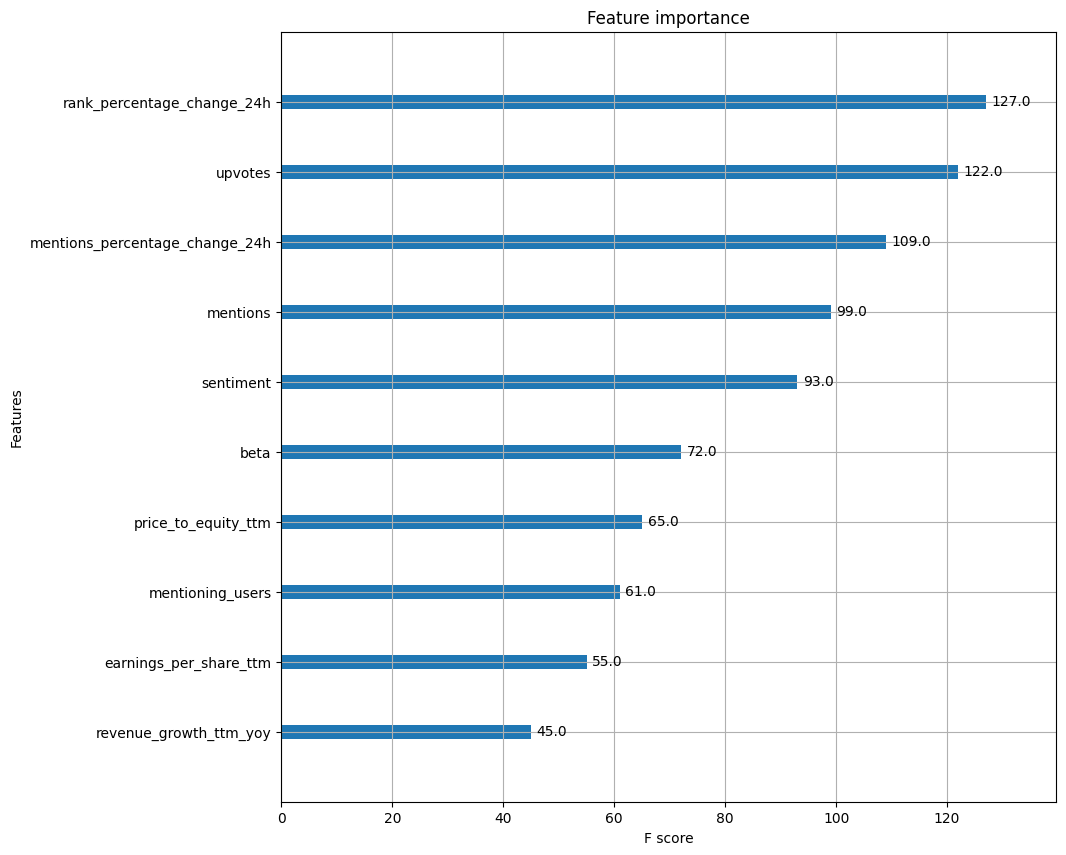

In [15]:
# visuallizing feature importnace

import matplotlib.pyplot as plt

xgb.plot_importance(random_search.best_estimator_, max_num_features=10)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()